**Mounting Google Drive**

In [10]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Installing Required Modules**

In [5]:
!pip install livelossplot

**Importing Required Modules**

In [6]:
import os
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation
from keras.callbacks import CSVLogger
from livelossplot import PlotLossesKeras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


**Unzipping the Dataset**

In [0]:
os.chdir('/content/drive/My Drive/')
!mkdir Pokemon_updated
!unzip -q Pokemon_updated.zip -d Pokemon_updated/

In [0]:
os.chdir('/content/drive/My Drive/Pokemon_updated/Pokemon/')
!ls


checkpoint_model_multi_01.hdf5	Test
checkpoint_model_multi_02.hdf5	Train
checkpoint_model_multi_03.hdf5	training_logs.csv
checkpoint_model_multi_04.hdf5	Validation
checkpoint_model_multi_05.hdf5


**Gathering Required Path Locations**

In [0]:
path = "/content/drive/My Drive/Pokemon_updated/Pokemon/"
training_data_dir = path + "Train" 
validation_data_dir = path + "Validation" 
test_data_dir = path + "Test" 

In [0]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

**Initializing Required Variables**

In [0]:
IMAGE_SIZE = 150
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 10
BATCH_SIZE = 32
TEST_SIZE = 30

In [0]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 340 images belonging to 6 classes.
Found 78 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


**Model Architecture**

In [0]:
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6))
model.add(Activation('sigmoid'))
    

model.compile(loss='sparse_categorical_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 

In [0]:
|model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 37, 37, 128)       73856     
__________

**Training the Model**

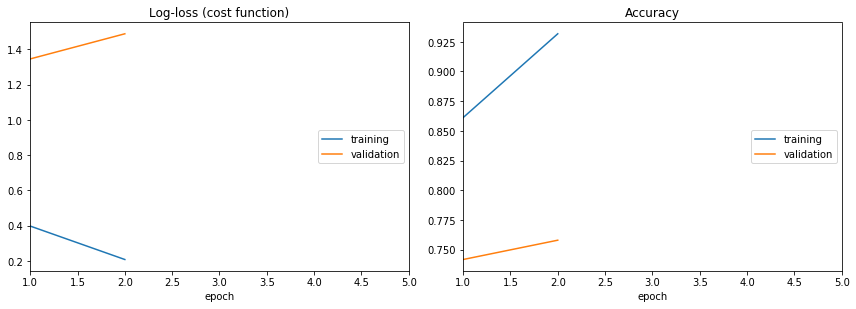

Log-loss (cost function):
training   (min:    0.208, max:    0.398, cur:    0.208)
validation (min:    1.346, max:    1.488, cur:    1.488)

Accuracy:
training   (min:    0.861, max:    0.932, cur:    0.932)
validation (min:    0.742, max:    0.758, cur:    0.758)

Epoch 00005: saving model to checkpoint_model_multi_05.hdf5


In [0]:

GOOGLE_COLAB = False
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "model_updated.h5"
EPOCHS=5
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames),
    epochs=EPOCHS,
    initial_epoch=3,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames),
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,append=False,separator=";"),save_model] )

**Saving Check Point**

In [0]:
filepath="checkpoint_model_multi_{epoch:02d}.hdf5"
save_model = ModelCheckpoint(filepath, monitor='val_acc', 
                                      verbose=1, save_best_only=False, 
                                      mode='auto', period=1)#Save every 1 epochs


In [0]:
!pip install livelossplot

**Saving the Model**

In [0]:
model.save('model_mulitple_classes.h5')

**Changing the Directory**

In [13]:
os.chdir('/content/drive/My Drive/Pokemon_updated/Pokemon/')
!ls

checkpoint_model_multi_01.hdf5	Test
checkpoint_model_multi_02.hdf5	Train
checkpoint_model_multi_03.hdf5	training_logs.csv
checkpoint_model_multi_04.hdf5	Validation
checkpoint_model_multi_05.hdf5


**Loading the Trained Model**

In [0]:
model=load_model('model_mulitple_classes.h5')

**Testing for new Images**

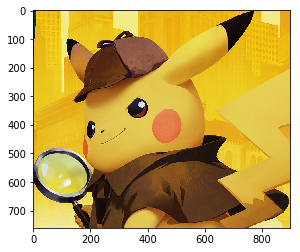

Pikachu


In [18]:
PATH=test_data_dir+'/13'
test_image = image.load_img(PATH, target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

img=mpimg.imread(PATH)
imgplot = plt.imshow(img)
plt.show()

classes=['Charmander','Pikachu','Squirtle','Bulbasaur','Meowth','Snorlax']


value=result[0].tolist().index(1)
print(classes[value])


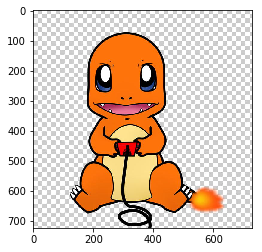

Charmander


In [31]:
PATH=test_data_dir+'/9.jpg'
test_image = image.load_img(PATH, target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

img=mpimg.imread(PATH)
imgplot = plt.imshow(img)
plt.show()

classes=['Charmander','Pikachu','Squirtle','Bulbasaur','Meowth','Snorlax']


value=result[0].tolist().index(1)
print(classes[value])
